In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(os.path.join(module_path, 'scripts'))

In [2]:
from typing import List

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

import utils

In [3]:
# Read results into DataFrame
def read_results(country_codes: List[str], target: str, feat_set_list: List[str]) -> pd.DataFrame:
    df_list = []
    for country_code in country_codes:
        for feat_set in feat_set_list:
            model_dir = get_model_dir(country_code, target, feat_set)
            df = pd.read_csv(f'{model_dir}/{country_code}_{target}_{feat_set}_results.csv')
            df_list.append(df)
    df_results = pd.concat(df_list).reset_index(drop=True).sort_values(['country_code', 'model_version'])
    return df_results

In [4]:
# Directory for figures
fig_dir = 'Z:/landscape_geoinfo/swat_models/swat_ml_comparison/rf/ml/figures/rf_performance'

In [5]:
country_codes = ['ESP', 'EST', 'ETH', 'USA']
catchment_names = [utils.get_catchment_name(country_code) for country_code in country_codes]
catchment_name_dict = dict(zip(country_codes, catchment_names))

# Plot RF performance at daily level

In [6]:
target = 'Q_d+1'
feat_set_list = ['FS1_d', 'FS2_d', 'FS3_d']
# test_size_list = [0.5, 0.4, 0.3, 0.2, 0.1]
test_size_list = [0.5]

In [7]:
results_df = pd.read_csv(f'Z:/landscape_geoinfo/swat_models/swat_ml_comparison/rf/ml/{target}_rf_metrics.csv')
results_df = results_df.sort_values('country_code')

In [8]:
results_df

,catchment_name,country_code,target,feat_set,test_size_int,nse_train,nse_test,rmse_train,rmse_test,nrmse_train,nrmse_test
0,Argos,ESP,Q_d+1,FS1_d,50,0.91,-0.01,0.13,0.65,1.35,6.77
1,Argos,ESP,Q_d+1,FS2_d,50,0.92,0.20,0.13,0.58,1.35,6.04
2,Argos,ESP,Q_d+1,FS3_d,50,0.90,0.24,0.14,0.57,1.46,5.94
6,Porijõgi,EST,Q_d+1,FS1_d,50,0.99,-0.67,0.24,1.54,1.08,6.94
7,Porijõgi,EST,Q_d+1,FS2_d,50,0.99,0.82,0.21,0.50,0.95,2.25
8,Porijõgi,EST,Q_d+1,FS3_d,50,0.99,0.85,0.21,0.46,0.95,2.07
9,Rib,ETH,Q_d+1,FS1_d,50,0.99,0.81,3.14,10.74,2.28,7.81
10,Rib,ETH,Q_d+1,FS2_d,50,0.98,0.88,3.57,8.50,2.59,6.18
11,Rib,ETH,Q_d+1,FS3_d,50,0.98,0.88,3.27,8.49,2.38,6.17
3,Bald Eagle,USA,Q_d+1,FS1_d,50,0.91,-1.02,4.26,17.62,1.13,4.68


C:\Users\holgerv\AppData\Local\Temp\ipykernel_111796\3411338913.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\holgerv\AppData\Local\Temp\ipykernel_111796\3411338913.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)


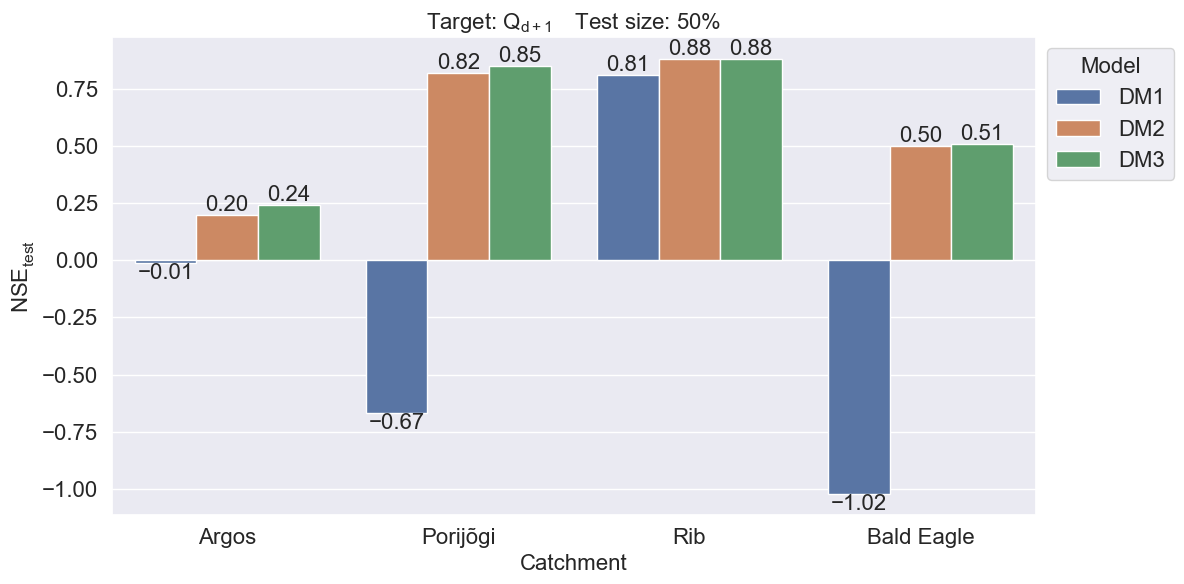

In [9]:
# Create figure and save as PNG
fontsize = 16
for test_size in test_size_list:
    test_size_int = test_size_int = int(test_size * 100)
    subset = results_df[results_df['test_size_int'] == test_size_int].reset_index(drop=True)
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    sns.barplot(y='nse_test', x='country_code', data=subset, hue='feat_set', ax=ax)
    ax.set_xticklabels(
        [utils.get_catchment_name(country_code) for country_code in country_codes], fontsize=fontsize
    )
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)
    ax.set_xlabel('Catchment', fontsize=fontsize)
    ax.set_ylabel('$\mathregular{NSE_{test}}$', fontsize=fontsize)
    for container in ax.containers:
        labels = [f'{label:.2f}'.replace('-', '\u2212') for label in container.datavalues]
        ax.bar_label(container, labels=labels, fontsize=fontsize)
    legend_handles, legend_labels = ax.get_legend_handles_labels()
    legend_labels = [
        utils.get_model_name(feat_set) for feat_set in subset['feat_set'].unique()
    ]
    plt.legend(
        handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1, 1), loc=2, title='Model', 
        title_fontsize=fontsize, fontsize=fontsize
    )
    plt.title(
        'Target: ' + f"$\mathregular{{{target.split('_')[0]}}}_\mathregular{{{target.split('_')[1]}}}$" +
        '$\quad$' +
        f'Test size: {int(test_size * 100)}%',
        fontsize=fontsize
    )
    plt.tight_layout()
    plt.savefig(f'{fig_dir}/{target}_rf_performance_{test_size_int}.png', dpi=300)

# Plot RF performance at monthly level

In [10]:
target = 'Q_m+1'
feat_set_list = ['FS1_m', 'FS2_m', 'FS3_m']
# test_size_list = [0.5, 0.4, 0.3, 0.2, 0.1]
test_size_list = [0.5]

In [11]:
results_df = pd.read_csv(f'Z:/landscape_geoinfo/swat_models/swat_ml_comparison/rf/ml/{target}_rf_metrics.csv')
results_df = results_df.sort_values('country_code')

In [12]:
results_df

,catchment_name,country_code,target,feat_set,test_size_int,nse_train,nse_test,rmse_train,rmse_test,nrmse_train,nrmse_test
0,Argos,ESP,Q_m+1,FS1_m,50,0.92,0.27,0.09,0.28,5.62,17.50
1,Argos,ESP,Q_m+1,FS2_m,50,0.92,0.34,0.08,0.27,5.00,16.88
2,Argos,ESP,Q_m+1,FS3_m,50,0.93,0.38,0.08,0.26,5.00,16.25
6,Porijõgi,EST,Q_m+1,FS1_m,50,0.90,0.13,0.49,0.82,5.63,9.43
7,Porijõgi,EST,Q_m+1,FS2_m,50,0.91,0.01,0.49,0.88,5.63,10.11
8,Porijõgi,EST,Q_m+1,FS3_m,50,0.90,0.05,0.50,0.86,5.75,9.89
9,Rib,ETH,Q_m+1,FS1_m,50,0.96,0.87,4.30,7.74,5.13,9.24
10,Rib,ETH,Q_m+1,FS2_m,50,0.97,0.76,3.88,10.43,4.63,12.45
11,Rib,ETH,Q_m+1,FS3_m,50,0.97,0.88,3.77,7.44,4.50,8.88
3,Bald Eagle,USA,Q_m+1,FS1_m,50,0.90,0.29,2.46,6.53,6.37,16.92


C:\Users\holgerv\AppData\Local\Temp\ipykernel_111796\3411338913.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\holgerv\AppData\Local\Temp\ipykernel_111796\3411338913.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)


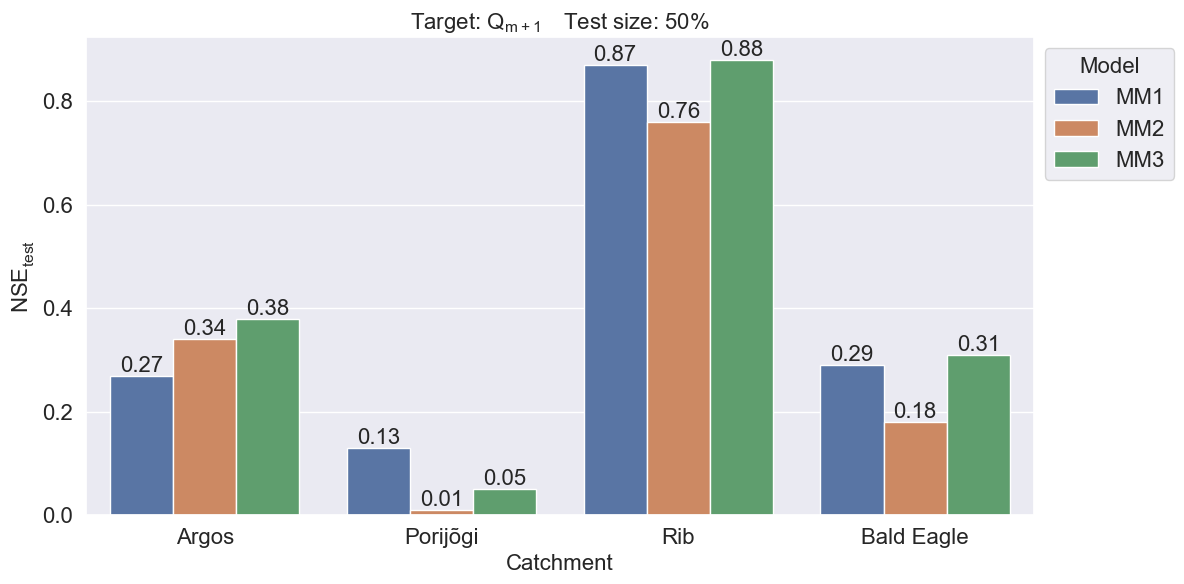

In [13]:
# Create figure and save as PNG
fontsize = 16
for test_size in test_size_list:
    test_size_int = test_size_int = int(test_size * 100)
    subset = results_df[results_df['test_size_int'] == test_size_int].reset_index(drop=True)
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    sns.barplot(y='nse_test', x='country_code', data=subset, hue='feat_set', ax=ax)
    ax.set_xticklabels(
        [utils.get_catchment_name(country_code) for country_code in country_codes], fontsize=fontsize
    )
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)
    ax.set_xlabel('Catchment', fontsize=fontsize)
    ax.set_ylabel('$\mathregular{NSE_{test}}$', fontsize=fontsize)
    for container in ax.containers:
        labels = [f'{label:.2f}'.replace('-', '\u2212') for label in container.datavalues]
        ax.bar_label(container, labels=labels, fontsize=fontsize)
    legend_handles, legend_labels = ax.get_legend_handles_labels()
    legend_labels = [
        utils.get_model_name(feat_set) for feat_set in subset['feat_set'].unique()
    ]
    plt.legend(
        handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1, 1), loc=2, title='Model', 
        title_fontsize=fontsize, fontsize=fontsize
    )
    plt.title(
        'Target: ' + f"$\mathregular{{{target.split('_')[0]}}}_\mathregular{{{target.split('_')[1]}}}$" +
        '$\quad$' +
        f'Test size: {int(test_size * 100)}%',
        fontsize=fontsize
    )
    plt.tight_layout()
    plt.savefig(f'{fig_dir}/{target}_rf_performance_{test_size_int}.png', dpi=300)

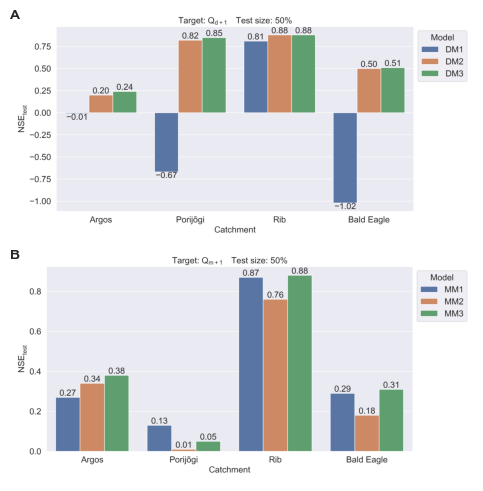

In [14]:
# Combine plots
targets = ['Q_d+1', 'Q_m+1']
images = [f'{fig_dir}/{target}_rf_performance_{test_size_int}.png' for target in targets]
letters = ['A', 'B']
fig, axes = plt.subplots(2, 1, layout='compressed')
for image, letter, ax in zip(images, letters, axes.flatten()):
    img = mpimg.imread(image)
    ax.imshow(img)
    ax.axis('off')
    ax.text(0, 1, letter, transform=ax.transAxes, fontsize=10, fontweight='bold', verticalalignment='top')
plt.savefig(f'{fig_dir}/nse_rf_performance_combined.png', dpi=300, bbox_inches='tight')